# **Assignment 15**

**Exploratory Data Analysis (EDA)**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [14]:
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [15]:

print(train_df.head())
print(test_df.head())
print(train_df.info())
print(test_df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

Check missing values in train and test sets

In [16]:
print("Missing values in train set:")
print(train_df.isnull().sum())
print("\nMissing values in test set:")
print(test_df.isnull().sum())

Missing values in train set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in test set:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


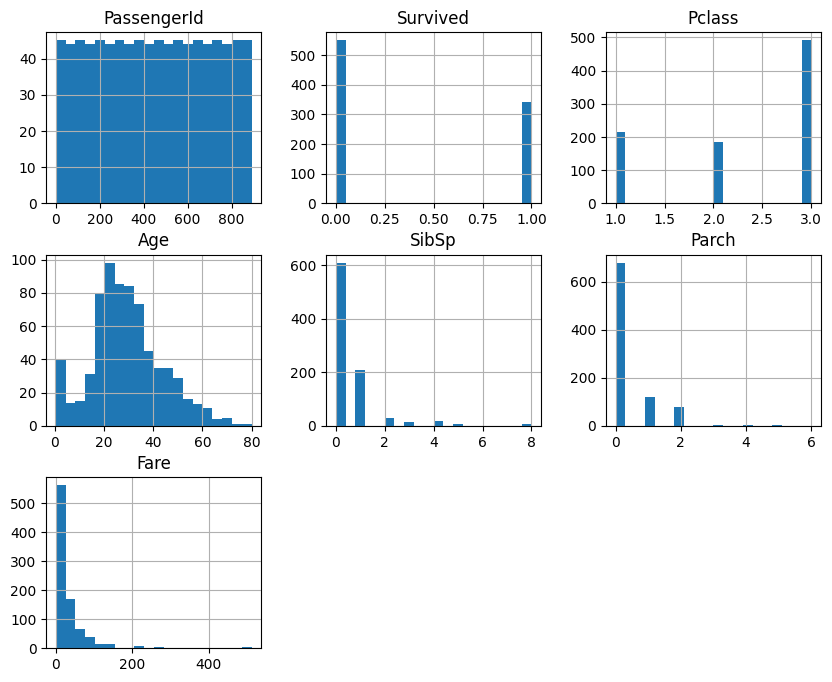

In [17]:
train_df.hist(bins=20, figsize=(10, 8))
plt.show()

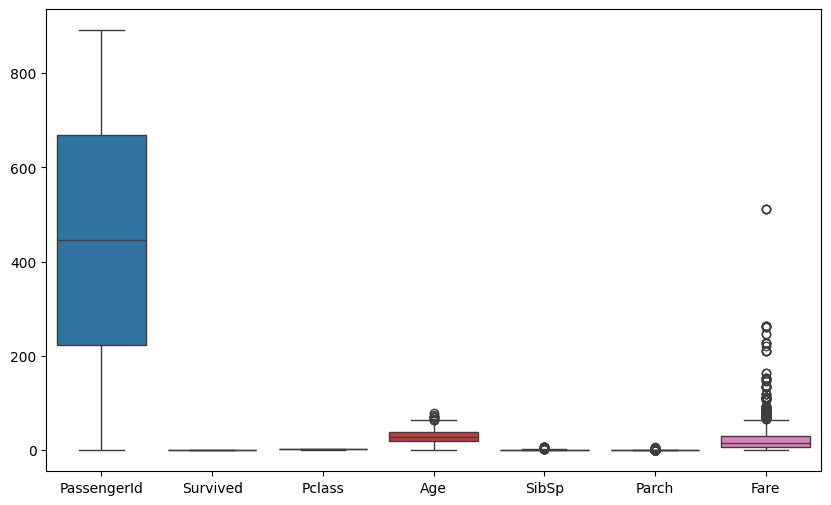

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df.select_dtypes(include=['float64', 'int64']))
plt.show()

Bar plots for categorical features

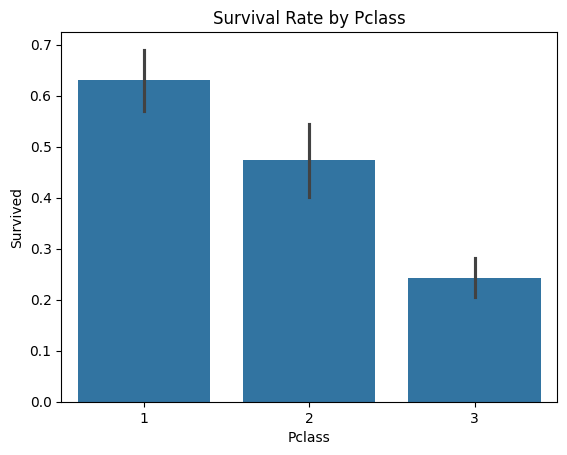

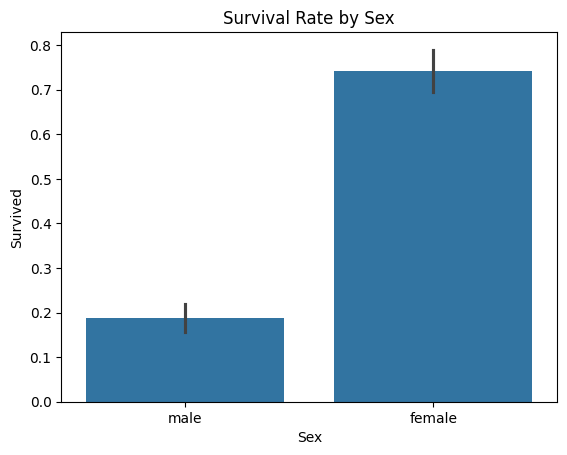

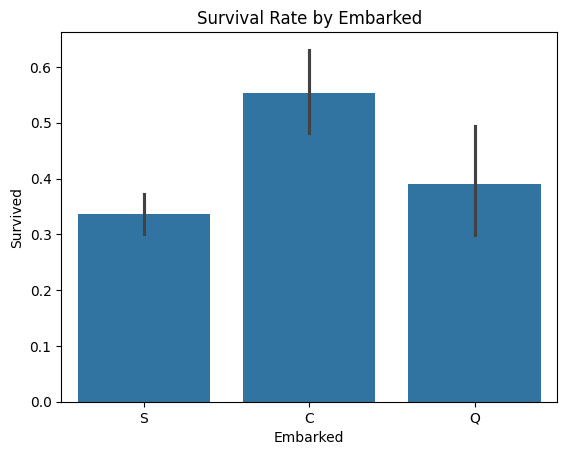

In [19]:
categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    sns.barplot(x=feature, y='Survived', data=train_df)
    plt.title(f"Survival Rate by {feature}")
    plt.show()

Scatter plot for numerical features

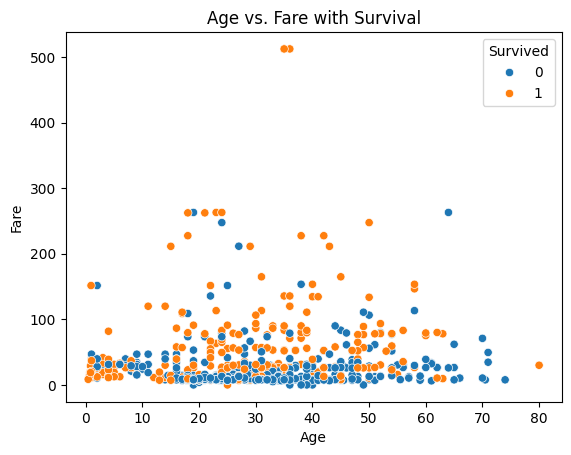

In [20]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)
plt.title("Age vs. Fare with Survival")
plt.show()

**Data Preprocessing**

In [21]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

<ipython-input-21-232f4ed164ec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-21-232f4ed164ec>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [22]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True) # Fill missing Embarked in train set with mode

<ipython-input-22-0be6a0f72384>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [23]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)# Fill missing Fare in test set with median

<ipython-input-23-5ad01e06e5f4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)# Fill missing Fare in test set with median


Encode categorical variables

One-hot encoding for categorical variables

In [24]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

Droping unnecessary columns

In [ ]:
train_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

**Building Predictive Models**

In [25]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Build LightGBM and XGBoost models**

In [34]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
!pip install lightgbm
!pip install xgboost

In [41]:
lgb_model = LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

lgb_model.fit(X_train, y_train) # Train LightGBM
lgb_pred = lgb_model.predict(X_val)

xgb_model.fit(X_train, y_train)# Train XGBoost
xgb_pred = xgb_model.predict(X_val)
print("_____________________________________________________________________")
print("LightGBM Classification Report:")
print(classification_report(y_val, lgb_pred))
print("\nXGBoost Classification Report:")
print(classification_report(y_val, xgb_pred))


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Cross-validation and hyperparameter tuning

In [42]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}


In [ ]:
grid_search = GridSearchCV(LGBMClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best LightGBM parameters: {grid_search.best_params_}")

**Comparative Analysis**

Compare performance metrics

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [48]:
metrics = {
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [accuracy_score(y_val, lgb_pred), accuracy_score(y_val, xgb_pred)],
    "Precision": [precision_score(y_val, lgb_pred), precision_score(y_val, xgb_pred)],
    "Recall": [recall_score(y_val, lgb_pred), recall_score(y_val, xgb_pred)],
    "F1-Score": [f1_score(y_val, lgb_pred), f1_score(y_val, xgb_pred)],
}

In [49]:
comparison_df = pd.DataFrame(metrics)
print(comparison_df)

      Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.826816   0.794521  0.783784  0.789116
1   XGBoost  0.821229   0.800000  0.756757  0.777778


**Bar plot for metrics comparison**

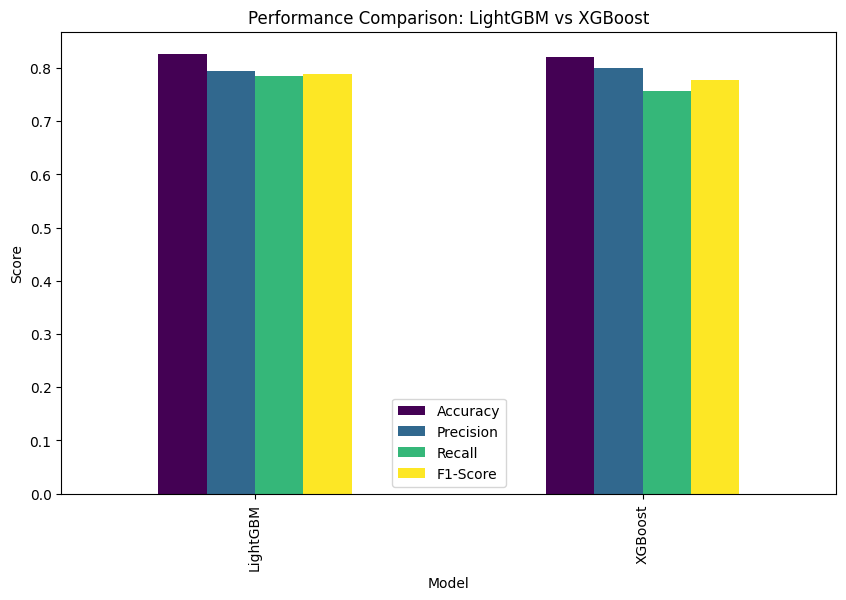

In [50]:
comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.show()